In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
from tqdm._tqdm_notebook import tqdm
tqdm.pandas()
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.callbacks import ModelCheckpoint, EarlyStopping, BackupAndRestore
import matplotlib.pyplot as plt


In [5]:
df  = pd.read_csv('./dataset/training.1600000.processed.noemoticon.csv', encoding = 'latin')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df.columns=['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
df.drop(columns=['id','date','query','user_id'], inplace=True)
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [8]:
df.shape

(1599999, 2)

In [9]:
df['sentiment'].value_counts()

sentiment
4    800000
0    799999
Name: count, dtype: int64

In [10]:
df['sentiment'] = df['sentiment'].replace(4,1)

In [11]:
df['sentiment'].value_counts()

sentiment
1    800000
0    799999
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   text       1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [13]:
df.describe()

,sentiment
count,1599999.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


In [14]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [15]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [16]:
df.dtypes

sentiment     int64
text         object
dtype: object

In [17]:
def preprocessing(text):
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for word in text:
        if word.isalnum():
            if word not in stopwords.words('english'):
                ps = SnowballStemmer('english')
                y.append(ps.stem(word))
    return " ".join(y)

In [18]:
k = preprocessing("It it counts, idk why I did either. you never talk to me anymore")
print(k)

count idk either never talk anymor


In [19]:
#df['text'] = df['text'].progress_apply(preprocessing)

In [20]:
#df.to_csv('processed_df.csv')
df = pd.read_csv('processed_df.csv',encoding = 'latin')
df.head()

,sentiment,text
0,0,upset ca updat facebook text might cri result ...
1,0,kenichan dive mani time ball manag save 50 res...
2,0,whole bodi feel itchi like fire
3,0,nationwideclass behav mad ca see
4,0,kwesidei whole crew


In [21]:
df['text'].isna().sum()

1615

In [22]:
df.dropna(inplace=True)
df['text'].isna().sum()

0

In [23]:
def length(sent):
    sent = word_tokenize(sent)
    length  = len(sent)
    return length

In [24]:
t = df['text'].iloc[281]
k = length(df['text'].iloc[0])
print(k,t)

12 lovemeagan work fan upset


In [25]:
df['length'] = df['text'].progress_apply(length)

  0%|          | 0/1598384 [00:00<?, ?it/s]

In [26]:
df.head()

,sentiment,text,length
0,0,upset ca updat facebook text might cri result ...,12
1,0,kenichan dive mani time ball manag save 50 res...,11
2,0,whole bodi feel itchi like fire,6
3,0,nationwideclass behav mad ca see,5
4,0,kwesidei whole crew,3


In [27]:
df['sentiment'].value_counts()

sentiment
0    799208
1    799176
Name: count, dtype: int64

In [28]:
df['length'].max()

50

In [29]:
corpus = df['text'].values
corpus[0]

'upset ca updat facebook text might cri result school today also blah'

In [59]:
tokenizer = Tokenizer(oov_token='<none>')
tokenizer.fit_on_texts(corpus)

In [60]:
tokenizer.index_word

{1: '<none>',
 2: 'go',
 3: 'get',
 4: 'day',
 5: 'good',
 6: 'work',
 7: 'like',
 8: 'love',
 9: 'quot',
 10: 'http',
 11: 'got',
 12: 'today',
 13: 'time',
 14: 'thank',
 15: 'lol',
 16: 'want',
 17: 'back',
 18: 'miss',
 19: 'one',
 20: 'know',
 21: 'u',
 22: 'see',
 23: 'feel',
 24: 'think',
 25: 'im',
 26: 'realli',
 27: 'amp',
 28: 'ca',
 29: 'hope',
 30: 'night',
 31: 'still',
 32: 'watch',
 33: 'need',
 34: 'make',
 35: 'well',
 36: 'new',
 37: 'na',
 38: 'home',
 39: 'look',
 40: 'oh',
 41: 'come',
 42: '2',
 43: 'much',
 44: 'last',
 45: 'twitter',
 46: 'morn',
 47: 'tomorrow',
 48: 'wish',
 49: 'great',
 50: 'wait',
 51: 'sad',
 52: 'sleep',
 53: 'haha',
 54: 'would',
 55: 'bad',
 56: 'fun',
 57: 'week',
 58: 'tri',
 59: 'right',
 60: 'follow',
 61: 'happi',
 62: '3',
 63: 'could',
 64: 'thing',
 65: 'sorri',
 66: 'friend',
 67: 'tonight',
 68: 'say',
 69: 'way',
 70: 'take',
 71: 'gon',
 72: 'nice',
 73: 'though',
 74: 'better',
 75: 'hate',
 76: 'even',
 77: 'yeah',
 78: '

In [61]:
sequences = tokenizer.texts_to_sequences(corpus)
sequences

[[591, 28, 224, 434, 364, 207, 239, 970, 82, 12, 192, 990],
 [21262, 3628, 232, 13, 862, 697, 506, 1281, 347, 2, 2789],
 [338, 648, 23, 2519, 7, 865],
 [27305, 4054, 454, 28, 22],
 [189686, 338, 1920],
 [33, 394],
 [114985, 88, 103, 13, 22, 93, 102, 175, 175, 15, 425, 14],
 [647],
 [54848, 2111, 189687],
 [1302, 328, 2624, 475, 1413],
 [843],
 [41677, 63, 1297, 32, 151, 12966, 1379, 2742],
 [189688, 763, 693, 381, 97, 124, 311],
 [189689, 54, 105, 2301, 26, 73, 3509, 29109, 189690],
 [189691, 48, 11, 32, 18, 189692, 2074],
 [2435, 895, 1597, 137, 1443, 32, 637, 29110, 4452, 446],
 [1246, 2275],
 [65989, 567, 538, 123, 16, 22, 1612, 8, 3158],
 [114986, 40, 488, 271, 2306, 1449, 271],
 [189693, 4, 3, 43, 119],
 [19, 66, 118, 291, 221, 3276, 3161, 12, 13, 501],
 [1262, 626, 561],
 [57, 2, 29],
 [37348, 282, 470, 47],
 [75, 118, 314, 81],
 [2, 239, 52, 32, 2951],
 [25, 51],
 [2759, 15, 7181, 125, 189, 7181, 189, 3, 454],
 [1747, 262, 2009, 689, 896, 3, 603, 315, 13],
 [3677, 1938, 522, 162

In [33]:
sequences = pad_sequences(sequences, padding='post')
sequences.shape

(1598384, 50)

In [34]:
label = df['sentiment'].values
label

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
X = sequences
Y = label
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y , random_state=5)

In [45]:
model = Sequential()
model.add(Embedding(525970,300, input_length=50))
model.add(Bidirectional(LSTM(64,dropout=0.2)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           157791000 
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

In [46]:
filepath = "./models/model-{epoch:02d}--{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True, save_freq="epoch")

In [47]:
backandrest = BackupAndRestore(backup_dir="./backup", save_freq="epoch")

In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
callback_list = [checkpoint,early_stop,backandrest]

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=32 ,epochs=5, validation_data=(X_test,y_test), callbacks=callback_list)

Epoch 1/5
39960/39960 [==============================] - ETA: 0s - loss: 0.4592 - accuracy: 0.7840
Epoch 1: val_accuracy improved from -inf to 0.79624, saving model to ./models\model-01--0.80.hdf5
39960/39960 [==============================] - 2936s 73ms/step - loss: 0.4592 - accuracy: 0.7840 - val_loss: 0.4375 - val_accuracy: 0.7962
Epoch 2/5
39960/39960 [==============================] - ETA: 0s - loss: 0.3330 - accuracy: 0.8587
Epoch 2: val_accuracy did not improve from 0.79624
39960/39960 [==============================] - 3038s 76ms/step - loss: 0.3330 - accuracy: 0.8587 - val_loss: 0.4897 - val_accuracy: 0.7747
Epoch 3/5
39960/39960 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.8845
Epoch 3: val_accuracy did not improve from 0.79624
39960/39960 [==============================] - 2810s 70ms/step - loss: 0.2741 - accuracy: 0.8845 - val_loss: 0.5140 - val_accuracy: 0.7704
Epoch 3: early stopping


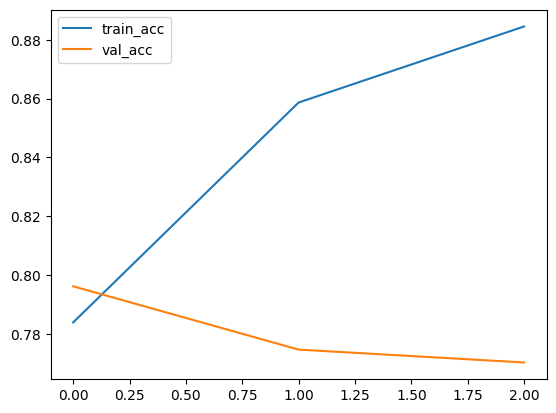

In [50]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

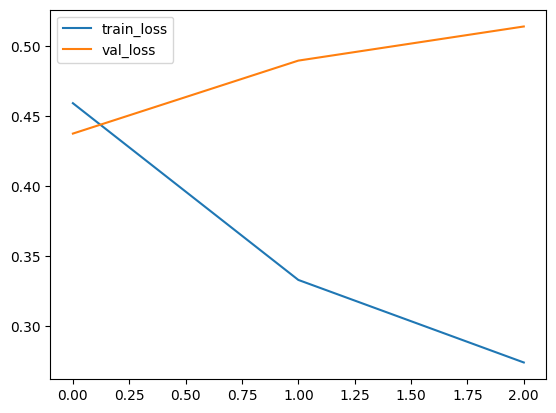

In [51]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [85]:
sent = "This movie was absolutely fantastic! The acting was superb, and the story kept me hooked until the very end."
preprocessed_sent = preprocessing(sent)
tokanized_sent = tokenizer.texts_to_sequences([preprocessed_sent])
padded_sent = pad_sequences(tokanized_sent, padding='post', maxlen=50)
prediction = model.predict(padded_sent)
if prediction[0] < 0.5:
    print(f'Negative with score {prediction[0]}')
else:
    print(f'Positive with score {prediction[0]}')

1/1 [==============================] - 0s 18ms/step
Positive with score [0.61864007]


In [90]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://9eae1938-5fb5-4b9a-8633-b251d38622cb/assets


INFO:tensorflow:Assets written to: ram://9eae1938-5fb5-4b9a-8633-b251d38622cb/assets
